# STA414: HW4 Q1

**Date**: April 5, 2021  
**First Name**: Mahrukh  
**Last Name**: Niazi  
**Student Id**: 1003948204

In [1]:
import random
random.seed(1)

# Q1. Unsupervised Learning

In [2]:
%matplotlib inline
import scipy
import numpy as np
import itertools
import matplotlib.pyplot as plt

## 1(a). Generating the data

First, we will generate some data for this problem. Set the number of points $N=400$, their dimension $D=2$, and the number of clusters $K=2$, and generate data from the distribution $p(x|z=k) = \mathcal{N}(\mu_k, \Sigma_k)$.
  Sample $200$ data points for $k=1$ and 200 for $k=2$, with

  $$
    \mu_1=
    \begin{bmatrix}
      0.1 \\
      0.1
    \end{bmatrix}
    \ \text{,}\
    \mu_2=
    \begin{bmatrix}
      6.0 \\
      0.1
    \end{bmatrix}
    \ \text{ and }\
    \Sigma_1=\Sigma_2=
    \begin{bmatrix}
      10       & 7 \\
      7 & 10
    \end{bmatrix}
  $$
  Here, $N=400$. Since you generated the data, you already know which sample comes from which class.
  Run the cell in the IPython notebook to generate the data.

In [3]:
# TODO: Run this cell to generate the data
num_samples = 400
cov = np.array([[1., .7], [.7, 1.]]) * 10
mean_1 = [.1, .1]
mean_2 = [6., .1]

x_class1 = np.random.multivariate_normal(mean_1, cov, num_samples // 2)
x_class2 = np.random.multivariate_normal(mean_2, cov, num_samples // 2)
xy_class1 = np.column_stack((x_class1, np.zeros(num_samples // 2)))
xy_class2 = np.column_stack((x_class2, np.ones(num_samples // 2)))
data_full = np.row_stack([xy_class1, xy_class2])
np.random.shuffle(data_full)
data = data_full[:, :2]
labels = data_full[:, 2]

### Make a scatter plot of the data points showing the true cluster assignment of each point using different color codes and shape (x for first class and circles for second class):

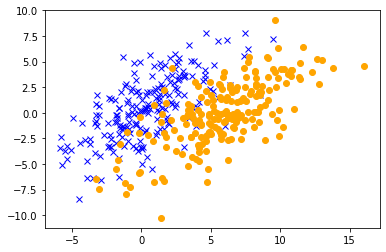

In [4]:
# TODO: Make a scatterplot for the data points showing the true cluster assignments of each point
plt.plot(xy_class1[:,0], xy_class1[:,1], 'x', color = 'blue') # first class, x shape
plt.plot(xy_class2[:,0], xy_class2[:,1], 'o', color = 'orange') # second class, circle shape

## 1(b). Implement and Run K-Means algorithm

Now, we assume that the true class labels are not known. Implement the k-means algorithm for this problem.
  Write two functions: `km_assignment_step`, and `km_refitting_step` as given in the lecture (Here, `km_` means k-means).
  Identify the correct arguments, and the order to run them. Initialize the algorithm with
  $$
    \hat\mu_1=
    \begin{bmatrix}
      0.0 \\
      0.0
    \end{bmatrix}
    \ \text{,}\
    \hat\mu_2=
    \begin{bmatrix}
      1.0 \\
      1.0
    \end{bmatrix}
  $$
  and run it until convergence.
  Show the resulting cluster assignments on a scatter plot either using different color codes or shape or both.
  Also plot the cost vs. the number of iterations. Report your misclassification error.

In [5]:
def cost(data, R, Mu):
    N, D = data.shape
    K = Mu.shape[1]
    J = 0
    for k in range(K):
        J += np.dot(np.linalg.norm(data - np.array([Mu[:, k], ] * N), axis=1)**2, R[:, k])
    return J

In [6]:
# TODO: K-Means Assignment Step
def km_assignment_step(data, Mu):
    """ Compute K-Means assignment step
    
    Args:
        data: a NxD matrix for the data points
        Mu: a DxK matrix for the cluster means locations
    
    Returns:
        R_new: a NxK matrix of responsibilities
    """
    
    # Fill this in:
    
    N, D =  data.shape # Number of datapoints and dimension of datapoint
    K = Mu.shape[1] # number of clusters
    r = np.zeros((N,K))
    
    for k in range(K):
        r[:, k] = np.linalg.norm(data - np.array([Mu[:, k], ] * N), axis=1)**2
        
    arg_min = np.argmin(r, axis=1) # argmax/argmin along dimension 1
    R_new = np.zeros((N,K)) # Set to zeros/ones with shape (N, K)
    R_new[range(N), arg_min] = 1 # Assign to 1
    
    return R_new

In [7]:
# TODO: K-means Refitting Step
def km_refitting_step(data, R, Mu):
    """ Compute K-Means refitting step.
    
    Args:
        data: a NxD matrix for the data points
        R: a NxK matrix of responsibilities
        Mu: a DxK matrix for the cluster means locations
    
    Returns:
        Mu_new: a DxK matrix for the new cluster means locations
    """
    N, D = data.shape # Number of datapoints and dimension of datapoint
    K = Mu.shape[1]  # number of clusters
    Mu_new = np.dot(data.T, R)/ np.sum(R, axis = 0)
    
    return Mu_new

In [8]:
# TODO: Run this cell to call the K-means algorithm
N, D = data.shape
K = 2
max_iter = 100
class_init = np.random.binomial(1., .5, size = N)
R = np.vstack([class_init, 1 - class_init]).T

Mu = np.zeros([D, K])
Mu[:, 1] = 1.
R.T.dot(data), np.sum(R, axis = 0)

cost_per_iteration = []

for it in range(max_iter):
    R = km_assignment_step(data, Mu)
    Mu = km_refitting_step(data, R, Mu)
    #print(it, cost(data, R, Mu))
    cost_per_iteration.append(cost(data, R, Mu))

class_1 = np.where(R[:, 0])
class_2 = np.where(R[:, 1])

### Show the resulting cluster assignments on a scatter plot either using different color codes or shape or both. Plot the cost vs. the number of iterations. Report your misclassification error.

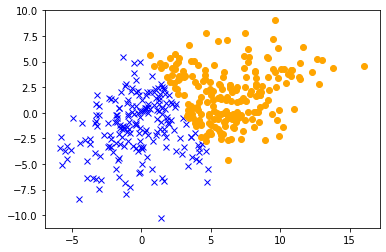

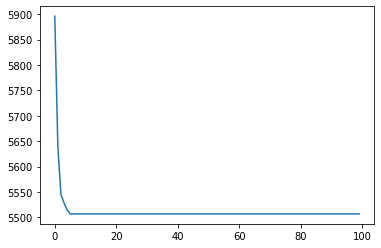

k-Means misclassification rate 0.255


In [9]:
# TODO: Make a scatterplot for the data points showing the K-Means cluster assignments of each point
plt.plot(data[class_1,0], data[class_1,1], 'x', color = 'blue') # first class, x shape
plt.plot(data[class_2,0], data[class_2,1], 'o', color = 'orange') # second class, circle shape
plt.show()

# Plot cost vs. number of iterations:
plt.plot(cost_per_iteration)
plt.show()

# Report misclassification rate:
sums = 0

for point in data[class_1, :2][0]:
    if point in xy_class1[:,:2]:
        sums = sums + 1
        
for point in data[class_2, :2][0]:
    if point in xy_class2[:,:2]:
        sums = sums + 1
        
print("k-Means misclassification rate", 1 - (sums) / (xy_class1[:,:2].shape[0] + xy_class2[:,:2].shape[0]))

## 1(c). Implement EM algorithm for Gaussian mixtures
Next, implement the EM algorithm for Gaussian mixtures.
  Write three functions: `log_likelihood`, `gm_e_step`, and `gm_m_step` as given in the lecture.
  Identify the correct arguments, and the order to run them.
  Initialize the algorithm with the same initialization as in Q2.1 for the means, and with $\hat\Sigma_1=\hat\Sigma_2=I$,
  and $\hat\pi_1=\hat\pi_2$ for the covariances.
    
  Run the algorithm until convergence and show the resulting cluster assignments on a scatter plot either using different color codes or shape or both.
  Also plot the log-likelihood vs. the number of iterations. Report your misclassification error.

In [10]:
def normal_density(x, mu, Sigma):
    return np.exp(-.5 * np.dot(x - mu, np.linalg.solve(Sigma, x - mu))) \
        / np.sqrt(np.linalg.det(2 * np.pi * Sigma))

In [11]:
def log_likelihood(data, Mu, Sigma, Pi):
    """ Compute log likelihood on the data given the Gaussian Mixture Parameters.
    
    Args:
        data: a NxD matrix for the data points
        Mu: a DxK matrix for the means of the K Gaussian Mixtures
        Sigma: a list of size K with each element being DxD covariance matrix
        Pi: a vector of size K for the mixing coefficients
    
    Returns:
        L: a scalar denoting the log likelihood of the data given the Gaussian Mixture
    """
    # Fill this in:
    
    N, D = data.shape  # Number of datapoints and dimension of datapoint
    K = Mu.shape[1] # number of mixtures
    L, T = 0., 0.
    
    for n in range(N):
        
        for k in range(K):
            T = T + Pi[k] * normal_density(data[n,:], Mu[:,k], Sigma[k]) # Compute the likelihood from the k-th Gaussian weighted by the mixing coefficients 
            
        L = L + np.log(T)
        
    return L

In [12]:
# TODO: Gaussian Mixture Expectation Step
def gm_e_step(data, Mu, Sigma, Pi):
    """ Gaussian Mixture Expectation Step.

    Args:
        data: a NxD matrix for the data points
        Mu: a DxK matrix for the means of the K Gaussian Mixtures
        Sigma: a list of size K with each element being DxD covariance matrix
        Pi: a vector of size K for the mixing coefficients
    
    Returns:
        Gamma: a NxK matrix of responsibilities 
    """
    # Fill this in:
    
    N, D = data.shape # Number of datapoints and dimension of datapoint
    K = Mu.shape[1] # number of mixtures
    Gamma = np.zeros((N, K)) # zeros of shape (N,K), matrix of responsibilities
    
    for n in range(N):
        for k in range(K):
            Gamma[n, k] = Pi[k] * normal_density(data[n,:], Mu[:,k], Sigma[k])
            
        Gamma[n, :] = Gamma[n, :] / np.sum(Gamma[n,:]) # Normalize by sum across second dimension (mixtures)
        
    return Gamma

In [13]:
# TODO: Gaussian Mixture Maximization Step
def gm_m_step(data, Gamma):
    """ Gaussian Mixture Maximization Step.

    Args:
        data: a NxD matrix for the data points
        Gamma: a NxK matrix of responsibilities 
    
    Returns:
        Mu: a DxK matrix for the means of the K Gaussian Mixtures
        Sigma: a list of size K with each element being DxD covariance matrix
        Pi: a vector of size K for the mixing coefficients
    """
    # Fill this in:
    
    N, D = data.shape # Number of datapoints and dimension of datapoint
    K = Gamma.shape[1]  # number of mixtures
    Nk = np.sum(Gamma, axis = 0) # Sum along first axis 
    Mu = (1./Nk) * np.dot(data.T, Gamma) 
    
    Sigma = []
    for k in range(K):
        Sigma.append(np.identity(D))

    for k in range(K):
        diff = data - Mu[:,k]
        A = np.identity(N) * Gamma[:,k] # N x N
        B = np.dot(np.dot(diff.T, A), diff)
        Sigma[k] = (1./Nk[k]) * B
        
    Pi = Nk / N 
    
    return Mu, Sigma, Pi

In [14]:
# TODO: Run this cell to call the Gaussian Mixture EM algorithm
N, D = data.shape
K = 2
Mu = np.zeros([D, K])
Mu[:, 1] = 1.
Sigma = [np.identity(2), np.identity(2)]
Pi = np.ones(K) / K
Gamma = np.zeros([N, K]) # Gamma is the matrix of responsibilities 

max_iter  = 200

loss = []
for it in range(max_iter):
    Gamma = gm_e_step(data, Mu, Sigma, Pi)
    Mu, Sigma, Pi = gm_m_step(data, Gamma)
    loss.append(log_likelihood(data, Mu, Sigma, Pi))
    # print(it, log_likelihood(data, Mu, Sigma, Pi)) # This function makes the computation longer, but good for debugging

class_1 = np.where(Gamma[:, 0] >= .5)
class_2 = np.where(Gamma[:, 1] >= .5)

### Show the resulting cluster assignments on a scatter plot either using different color codes or shape or both. Also plot the log-likelihood vs. the number of iterations. Report your misclassification error.

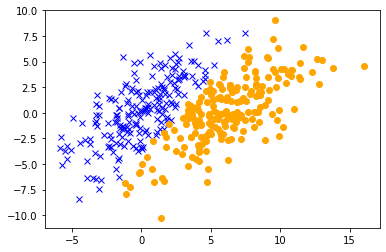

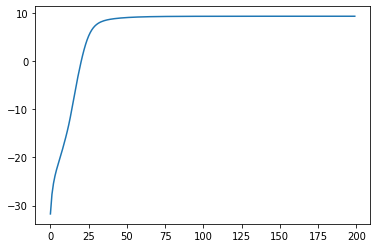

EM misclassification rate 0.09250000000000003


In [15]:
# TODO: Make a scatterplot for the data points showing the Gaussian Mixture cluster assignments of each point
plt.plot(data[class_1,0], data[class_1,1], 'x', color = 'blue') # first class, x shape
plt.plot(data[class_2,0], data[class_2,1], 'o', color = 'orange') # second class, circle shape
plt.show()

# Plot log-likelihood vs. number of iterations:
plt.plot(loss)
plt.show()

# Report misclassification rate:
sums = 0

for point in data[class_1, :2][0]:
    if point in xy_class1[:,:2]:
        sums = sums + 1
        
for point in data[class_2, :2][0]:
    if point in xy_class2[:,:2]:
        sums = sums + 1
        
print("EM misclassification rate", 1-(sums) / (xy_class1[:,:2].shape[0] + xy_class2[:,:2].shape[0]))

## 1(d). Comment on findings

**Compare the performance of k-Means and EM based on the resulting cluster assignments.**
- EM performs better since it has a lower misclassification rate (0.09 versus 0.26 for k-Means).

**Compare the performance of k-Means and EM based on their convergence rate. What is the bottleneck for which method?**
- k-Means converges quicker than EM as seen on the cost vs. number of iterations plot (converges at around iteration number 5 vs for EM the log-likelihood converges at around iteration 50).
- Thus, the bottleneck is that EM has a more gradual convergence rate than k-Means becasue each cycle requires more computation. Additionally, there are generally multiple local maxima of the log likelihood function so the bottleneck of EM is that it may not find the largest of these maxima. 
- For k-Means, the bottleneck is that it doesnt perform well when the clusters are of varying sizes and densities. So its predictions are not as good as EMs.


## 1(d). Additional experiments

**Experiment with 5 different data realizations (generate new data), run your algorithms, and summarize your findings. Does the algorithm performance depend on different realizations of data?**

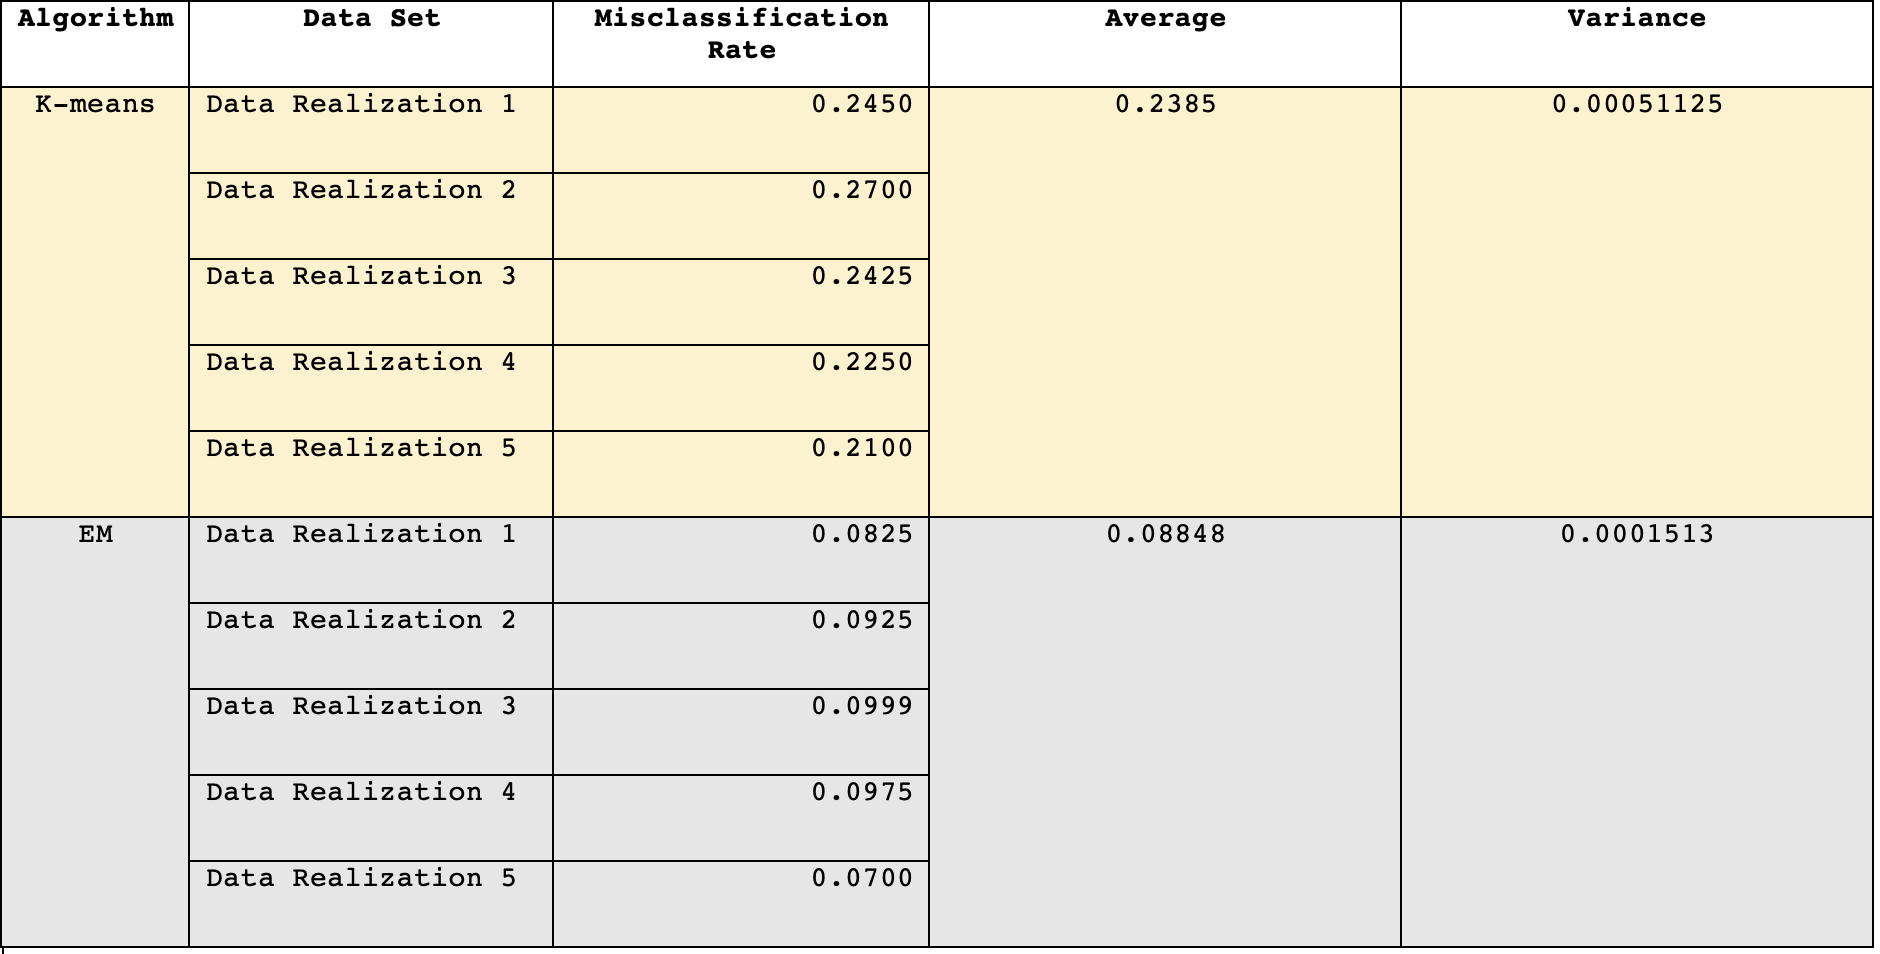

The table above shows that on average, K-means has a misclassification rate of 0.2385, which is higher than that for EM (0.08848). The table also shows that there is more variance for K-means between each run than that for EM, which indicates that the performance of the algorithm does depend on the realizations of the data.